# Signals and Systems for Dummies, Chapter 11

In [1]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


Text(0.5, 0, 'Frequency (Rad/Sample)')

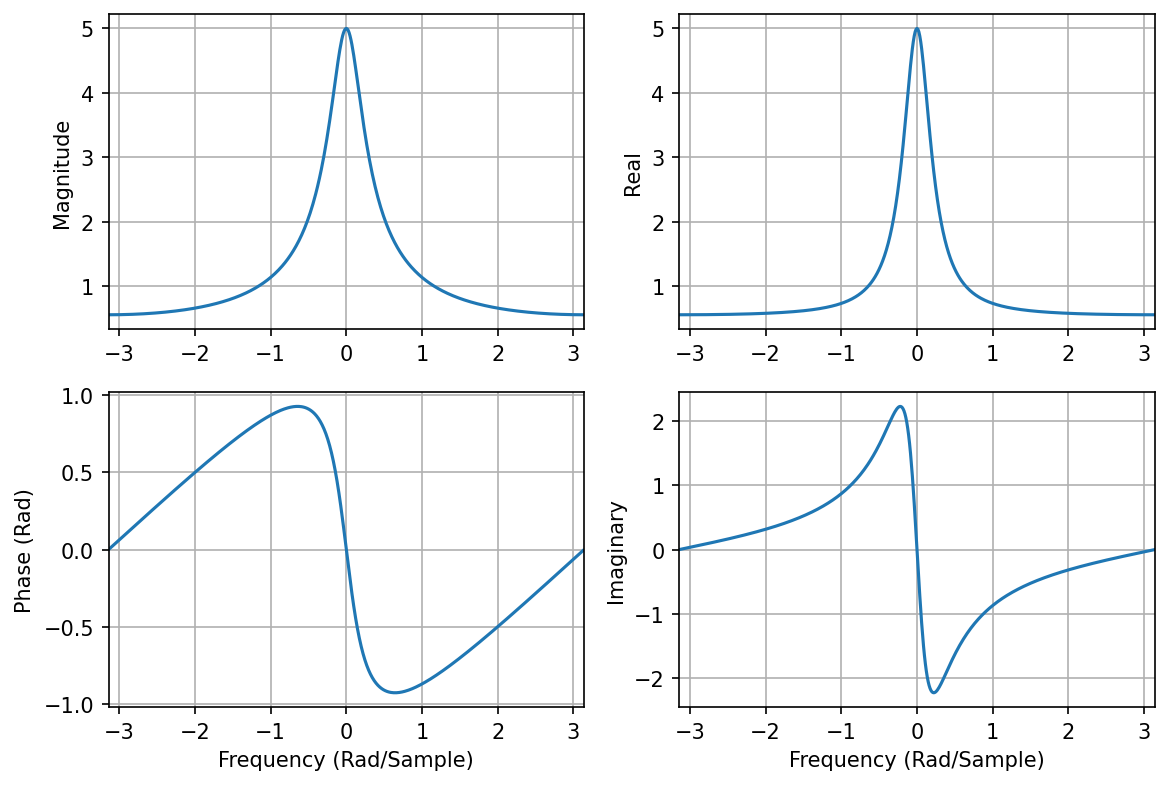

In [41]:
a = 0.8

bk = 1
ak = [1, -a]

w, h = signal.freqz(bk, ak, worN=np.linspace(-np.pi, np.pi, 512+1)[:-1])
# w = fft.fftshift(w)
# w[w >= np.pi] = w[w >= np.pi]-2*np.pi
# h = fft.fftshift(h)

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, dpi=150, figsize=(9, 6))
axs[0, 0].plot(w, np.abs(h))
axs[0, 0].set_ylabel("Magnitude")
axs[0, 0].grid()
axs[0, 0].set_xlim(left=-np.pi, right=np.pi)
axs[0, 0].tick_params(labelbottom=True)
axs[1, 0].plot(w, np.angle(h))
axs[1, 0].grid()
axs[1, 0].set_ylabel("Phase (Rad)")
axs[1, 0].set_xlabel("Frequency (Rad/Sample)")
axs[0, 1].plot(w, h.real)
axs[0, 1].set_ylabel("Real")
axs[0, 1].grid()
axs[0, 1].tick_params(labelbottom=True)
axs[1, 1].plot(w, h.imag)
axs[1, 1].grid()
axs[1, 1].set_ylabel("Imaginary")
axs[1, 1].set_xlabel("Frequency (Rad/Sample)")